In [1]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import madrigalWeb.madrigalWeb
import os
import h5py
import numpy as np

In [2]:
#CHANGE ME
user_fullname = "Student Example"
user_email = "isr.summer.school@gmail.com"
user_affiliation = "ISR Summer School 2024"

maddat = madrigalWeb.madrigalWeb.MadrigalData('https://data.amisr.com/madrigal/')

In [3]:
#instrument codes for AMISR
instcodes={'PFISR':61,
          'RISR-N':91,
          'RISR-C':92}

In [4]:
#start time 
#This changed to our expermint (Group 5) start/End time 
st=datetime.datetime(2025,7,22,4,3,42)
et=datetime.datetime(2025,7,22,5,59,56)
expList = maddat.getExperiments(instcodes['PFISR'],
                st.year, st.month, st.day, st.hour, st.minute, st.second,
                et.year, et.month, et.day, et.hour, et.minute, et.second)
for exp in expList:
    print(exp)

id: 30003350
realUrl: http://data.amisr.com/madrigal/showExperiment/?experiment_list=30003350
url: http://data.amisr.com/madrigal/madtoc/experiments0/2025/pfa/22jul25n
name: ISRSchl2025Grp5PFTEC.v01 - Poker Flat TEC
siteid: 3
sitename: SRI
instcode: 61
instname: Poker Flat IS Radar
startyear: 2025
startmonth: 7
startday: 22
starthour: 4
startmin: 3
startsec: 42
endyear: 2025
endmonth: 7
endday: 22
endhour: 5
endmin: 59
endsec: 56
isLocal: True
madrigalUrl: http://https://data.amisr.com/madrigal
PI: Asti Bhatt
PIEmail: asti.bhatt@sri.com
uttimestamp: 1753300274
access: 0
Madrigal version: 3.4



In [5]:
# Get all the files associated with the experiment:
fileList = maddat.getExperimentFiles(expList[0].id)
for file in fileList:
    print(os.path.basename(file.name),'\tkindat:',file.kindat,'desc:',file.kindatdesc)

pfa20250722.014_ac_nenotr_01min.001.h5 	kindat: 1000201 desc: Ne From Power - Alternating Code (E-region) - 1 min
pfa20250722.014_ac_fit_01min.001.h5 	kindat: 2000201 desc: Fitted - Alternating Code (E-region) - 1 min
pfa20250722.014_ac_nenotr_03min.001.h5 	kindat: 1000203 desc: Ne From Power - Alternating Code (E-region) - 3 min
pfa20250722.014_ac_fit_03min.001.h5 	kindat: 2000203 desc: Fitted - Alternating Code (E-region) - 3 min
pfa20250722.014_ac_nenotr_05min.001.h5 	kindat: 1000205 desc: Ne From Power - Alternating Code (E-region) - 5 min
pfa20250722.014_ac_fit_05min.001.h5 	kindat: 2000205 desc: Fitted - Alternating Code (E-region) - 5 min
pfa20250722.014_ac_nenotr_10min.001.h5 	kindat: 1000210 desc: Ne From Power - Alternating Code (E-region) - 10 min
pfa20250722.014_ac_fit_10min.001.h5 	kindat: 2000210 desc: Fitted - Alternating Code (E-region) - 10 min
pfa20250722.014_ac_nenotr_15min.001.h5 	kindat: 1000215 desc: Ne From Power - Alternating Code (E-region) - 15 min
pfa20250722

In [21]:
# Download a specific file from the experiment
#Here I have changed the part from example 1 (Ne From Power) to read file (Fitted)

fileList = maddat.getExperimentFiles(expList[0].id)
lpfile=None
for file in fileList:
    if 'Fitted' in file.kindatdesc:
        if 'F-region' in  file.kindatdesc:
            if '5 min' in  file.kindatdesc:
                lpfile=file
                break
        
filename     = lpfile.name
outfilename  = os.path.basename(lpfile.name)
result = maddat.downloadFile(filename, outfilename, user_fullname, user_email, user_affiliation, 'hdf5')

In [22]:
# Explore the HDF5 madrigal metadata
with h5py.File(outfilename,'r') as f:
    for key1,val1 in f.items():
        print(key1,val1)
        for key2,val2 in val1.items():
            print(" ",key2,val2)        

Data <HDF5 group "/Data" (2 members)>
  Array Layout <HDF5 group "/Data/Array Layout" (4 members)>
  Table Layout <HDF5 dataset "Table Layout": shape (6808,), type "|V280">
Metadata <HDF5 group "/Metadata" (6 members)>
  Data Parameters <HDF5 dataset "Data Parameters": shape (35,), type "|V99">
  Experiment Notes <HDF5 dataset "Experiment Notes": shape (92,), type "|V8">
  Experiment Parameters <HDF5 dataset "Experiment Parameters": shape (14,), type "|V16">
  Independent Spatial Parameters <HDF5 dataset "Independent Spatial Parameters": shape (1,), type "|V10">
  Parameters Used to Split Array Data <HDF5 dataset "Parameters Used to Split Array Data": shape (1,), type "|V21">
  _record_layout <HDF5 dataset "_record_layout": shape (1,), type "|V280">


In [23]:
# Explore the HDF5 madrigal data from the first beam in /Data/Array Layout
with h5py.File(outfilename,'r') as f:
    for key1,val1 in f["/Data/Array Layout"].items():
        print(key1,val1)
        for key2,val2 in val1.items():
            print(" ",key2,val2) 
            try:
                for key3,val3 in val2.items():
                    print("   ",key3,val3)      
            except:
                pass
        break

Array with beamid=64016  <HDF5 group "/Data/Array Layout/Array with beamid=64016 " (5 members)>
  1D Parameters <HDF5 group "/Data/Array Layout/Array with beamid=64016 /1D Parameters" (11 members)>
    Data Parameters <HDF5 dataset "Data Parameters": shape (10,), type "|V88">
    azm <HDF5 dataset "azm": shape (23,), type "<f8">
    beamid <HDF5 dataset "beamid": shape (23,), type "<i8">
    cbadl <HDF5 dataset "cbadl": shape (23,), type "<f8">
    elm <HDF5 dataset "elm": shape (23,), type "<f8">
    numrxaeu <HDF5 dataset "numrxaeu": shape (23,), type "<f8">
    numtxaeu <HDF5 dataset "numtxaeu": shape (23,), type "<f8">
    pl <HDF5 dataset "pl": shape (23,), type "<f8">
    power <HDF5 dataset "power": shape (23,), type "<f8">
    rfreq <HDF5 dataset "rfreq": shape (23,), type "<f8">
    tfreq <HDF5 dataset "tfreq": shape (23,), type "<f8">
  2D Parameters <HDF5 group "/Data/Array Layout/Array with beamid=64016 /2D Parameters" (14 members)>
    Data Parameters <HDF5 dataset "Data P

In [29]:
#I used UTC here
from datetime import datetime, UTC

with h5py.File(outfilename,'r') as f:
    PFISR_data = []
    for dat in f['Data/Array Layout'].values():
        outdct={}
        outdct['bid'] = dat['1D Parameters/beamid'][0]
        outdct['azm'] = dat['1D Parameters/azm'][0]
        outdct['elm'] = dat['1D Parameters/elm'][0]
        outdct['ne'] = dat['2D Parameters/ne'][:]     # different from old SRI madrigal 2
        outdct['dne'] = dat['2D Parameters/dne'][:]   # different from old SRI madrigal 2
        outdct['te'] = dat['2D Parameters/te'][:]
        outdct['dte'] = dat['2D Parameters/dte'][:]
        outdct['ti'] = dat['2D Parameters/ti'][:]
        outdct['dti'] = dat['2D Parameters/dti'][:]
        outdct['vo'] = dat['2D Parameters/vo'][:]
        outdct['dvo'] = dat['2D Parameters/dvo'][:]
        
        outdct['range'] = dat['range'][:]
        outdct['altitude'] = outdct['range']*np.sin(np.radians(outdct['elm']))
        tstmp = dat['timestamps'][:]
        #outdct['time'] = [datetime.datetime.utcfromtimestamp(t) for t in tstmp]
        outdct['time'] = [datetime.fromtimestamp(t, UTC) for t in tstmp]
        PFISR_data.append(outdct)

In [30]:
for i,d in enumerate(PFISR_data):
    print(d['bid'],d['azm'],d['elm'])

64016 14.039999961853027 90.0
64157 -154.3000030517578 77.5
64964 -34.689998626708984 66.08999633789062
65066 75.02999877929688 65.55999755859375


In [31]:
#find the up-B beam : 64157 az = -154.3, el = 77.5
bind = np.argmin(np.abs(np.array([x['elm'] for x in PFISR_data]) - ( 77.5)))
bdat = PFISR_data[bind]

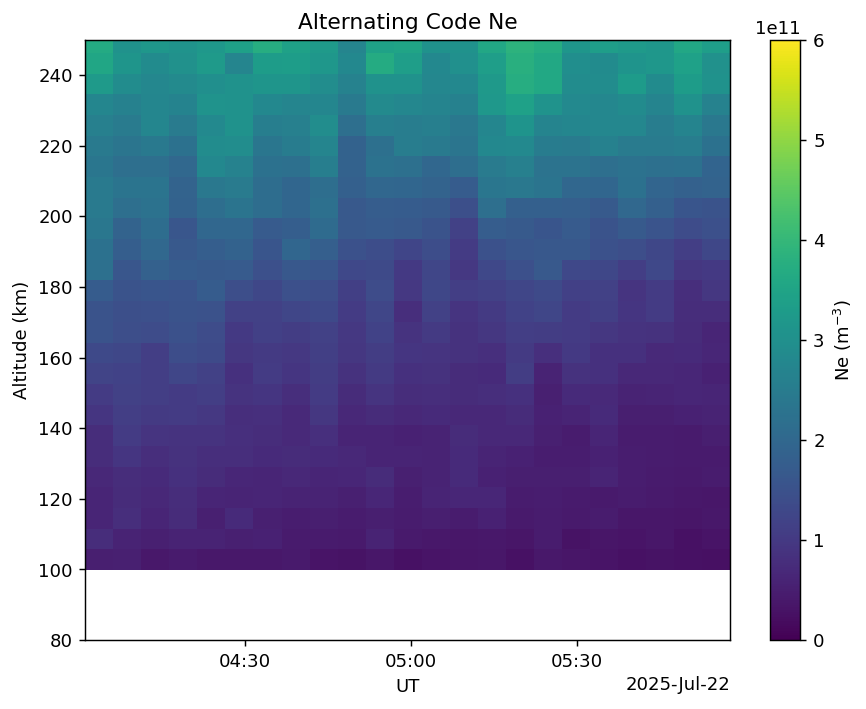

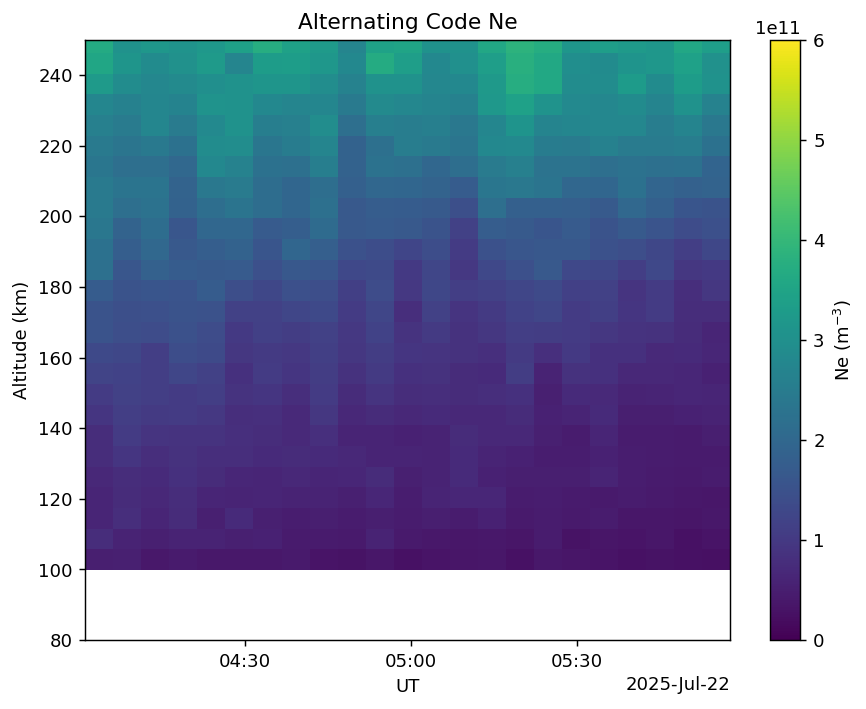

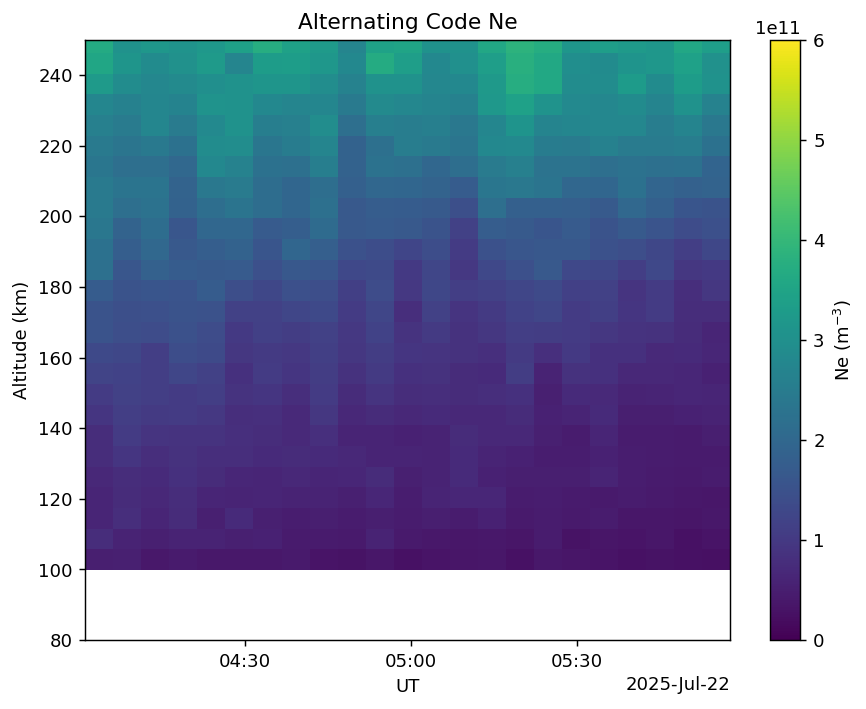

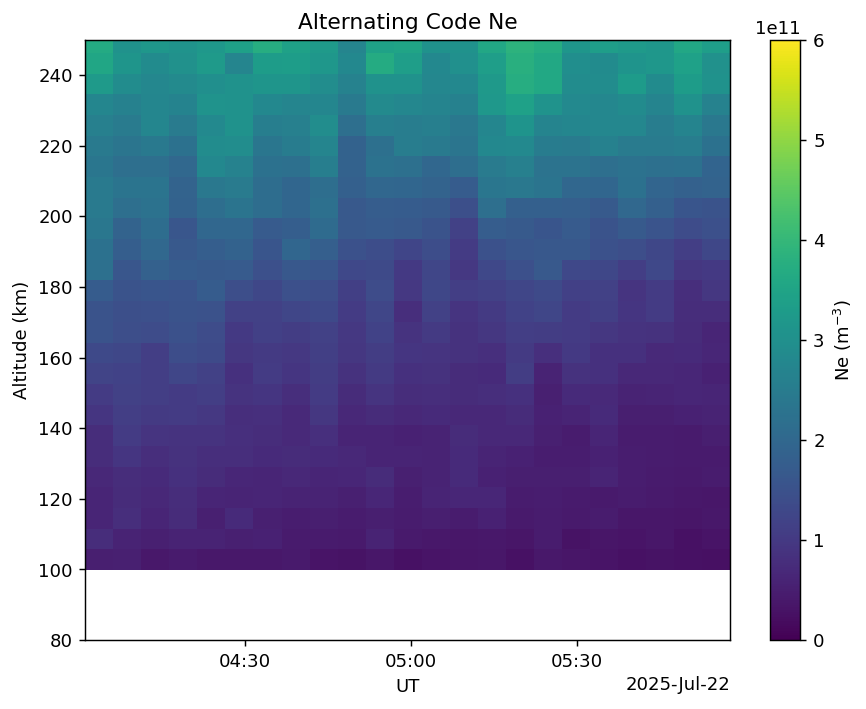

In [33]:
fig,ax=plt.subplots(figsize=(8,6), dpi=130)
clrs = ax.pcolormesh(mdates.date2num(bdat['time']),bdat['altitude']/1e3,bdat['ne'],vmin=0,vmax=6e11,shading='nearest')

locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_ylim([80,250])

ax.set_xlabel('UT')
ax.set_ylabel('Altitude (km)')
ax.set_title('Alternating Code Ne')

cb=fig.colorbar(clrs)
cb.set_label('Ne (m$^{-3}$)')

plt.show()